# Lecture 1: One- and multi-dimensional signals

In [2]:
## MP 573 Lecture 1: One- and multi-dimensional signals
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio

# Q1: Real and imaginary signals

For the complex sinusoid in the next cell, consider the effect of changing the frequency u0 (say, use values 0.2, 0.5, 0.7, 1.0, 2.0). What is the effect of changing u0 on the real, imaginary, magnitude, and phase components of the signal? 

A. Real and imaginary parts are unaltered, magnitude and phase are both scaled with u0

B. Nothing changes in the signal

C. Real and imaginary parts contain more or fewer oscillations per unit space, depending on u0. Magnitude is unaltered. The slope of the phase as a function of space (x) depends linearly on the frequency (u0), although the phase is 'wrapped' at $-\pi$ and $\pi$. 



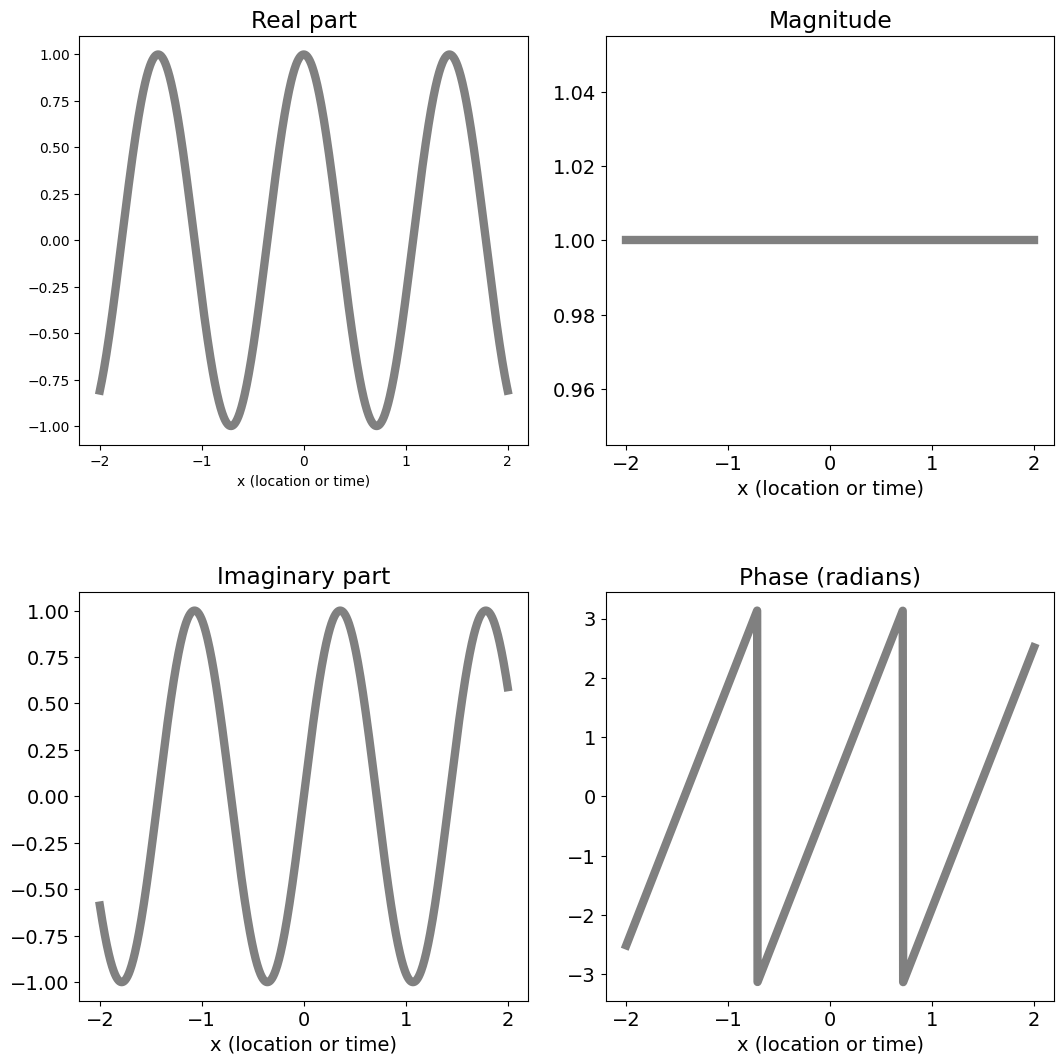

In [3]:
# Simulate 1D complex sinusoidal signal, and plot its real/imaginary values, and also magnitude/phase
N = 1001
xmax = 2
x = np.linspace(-xmax,xmax,N)
u0 = 0.7 # This is the frequency of our complex exponential, in cycles per unit length
s = np.exp(1j*2*np.pi*u0*x)
plt.figure(figsize=(12,12))
font = {'weight' : 'normal',
        'size'   : 14}

# First plot the real and imaginary parts
plt.subplot(2,2,1)
plt.rc('font', **font)
plt.plot(x,np.real(s),'gray',linewidth=6.0)
plt.xlabel('x (location or time)')
plt.title('Real part')
plt.subplot(2,2,3)
plt.rc('font', **font)
plt.plot(x,np.imag(s),'gray',linewidth=6.0)
plt.title('Imaginary part')
plt.xlabel('x (location or time)')
plt.tight_layout(pad=4.0)

# Now plot its magnitude and phase
plt.subplot(2,2,2)
plt.rc('font', **font)
plt.plot(x,np.abs(s),'gray',linewidth=6.0)
plt.xlabel('x (location or time)')
plt.title('Magnitude')
plt.subplot(2,2,4)
plt.rc('font', **font)
plt.plot(x,np.angle(s),'gray',linewidth=6.0)
plt.title('Phase (radians)')
plt.xlabel('x (location or time)');

# Q2: Complex sinusoid in 2D

We can write a N-D complex sinusoid as follows

$f(\mathbf{r}) = A e^{\phi_0} e^{i 2 \pi \mathbf{u_0}\cdot \mathbf{r}}$. 

In the computational example below, we create a 2D complex exponential and display it over a field of view of size 4 along each of the two dimensions. The variables u01 and u02 represent the horizontal and vertical spatial frequencies, respectively. 

Question: What values of u01 and u02 do we need to set in order to obtain 8 cycles along the horizontal dimension and 2 cycles along the vertical dimension of the field of view? 

A: u01=2, u02=0.5

B: u01=1, u02=2

C: u01=8, u02=2

D: u01=4, u02=7


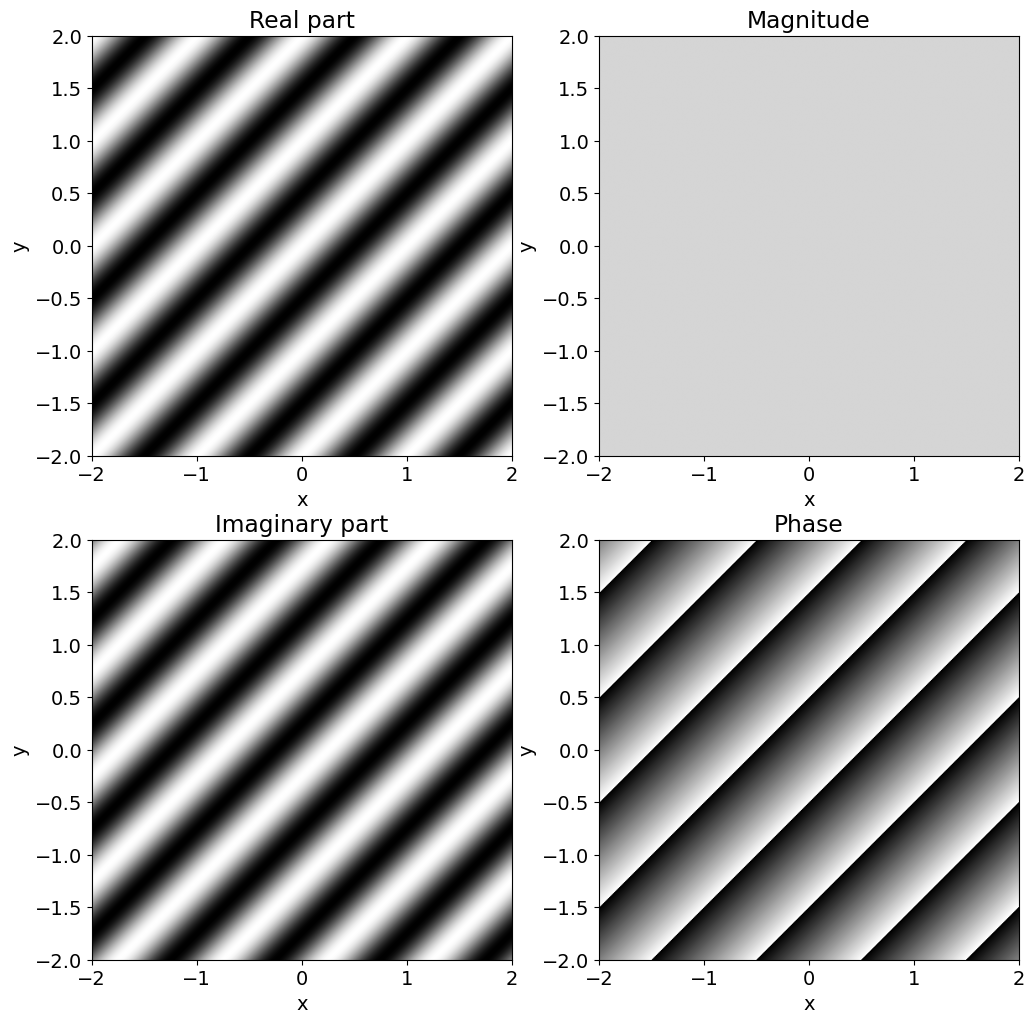

In [4]:
# Simulate 2D complex sinusoidal signal, and plot its real/imaginary values, and also magnitude/phase
N = 501
xmax = 2
x = np.linspace(-xmax,xmax,N)
y = x;
X, Y = np.meshgrid(x,y)
u01 = 1 # This is the frequency along x
u02 = 1 # This is the frequency along y
A = 1 # This is the amplitude of our signal
phi0 = 0 # This is the phase of our signal at the origin
s = A*np.exp(1j*(phi0 + 2*np.pi*(u01*X + u02*Y)))
plt.figure(figsize=(12,12))


# Display the real and imaginary parts
plt.rc('font', **font)
plt.subplot(2,2,1)
imgplot = plt.imshow(np.real(s),extent = [x[0], x[N-1], y[0], y[N-1]],cmap='gray')
plt.title('Real part')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,3)
imgplot = plt.imshow(np.imag(s),extent = [x[0], x[N-1], y[0], y[N-1]],cmap='gray')
plt.title('Imaginary part')
plt.xlabel('x')
plt.ylabel('y')

# Display the magnitude and phase
plt.subplot(2,2,2)
imgplot = plt.imshow(np.abs(s),extent = [x[0], x[N-1], y[0], y[N-1]],cmap='gray',vmin=0, vmax=1.2)
plt.title('Magnitude')
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(2,2,4)
imgplot = plt.imshow(np.angle(s),extent = [x[0], x[N-1], y[0], y[N-1]],cmap='gray')
plt.title('Phase')
plt.xlabel('x')
plt.ylabel('y');

# Q3: Scaling property of the delta function

The scaling property of the delta function states that if we squeeze our delta function "horizontally" by a factor $a$, we obtain: $\delta(ax) = \frac{\delta(x)}{|a|}$ (ie: a "vertically" scaled version of the delta function). 

Among other implications, this leads to the following relationship: 
$\int_{-\infty}^{\infty} \delta (ax) dx = \frac{1}{|a|}$

However, this idea that squeezing our delta function "horizontally" is the same as scaling it "vertically" may not be very intuitive, since it does not hold for most functions that we encounter. So, in this exercise we will try to develop some intuition for this property.

One way to think about the delta function is as a limit of "bump-shaped" functions that get narrower and taller, for instance as the limit of a Gaussian function:

$\delta(x) = \lim_{\epsilon \to 0^+} \frac{1}{2 \sqrt{\pi \epsilon}} e^{-\frac{x^2}{4 \epsilon}}$

So let us create a non-limit version of this function, ie:

$\delta_{\epsilon}(x) = \frac{1}{2 \sqrt{\pi \epsilon}} e^{-\frac{x^2}{4 \epsilon}}$

for some $\epsilon > 0$. 

Question: what happens to the area if we squeeze this function by a factor of $a=4$, ie: what is the area of $\delta_{\epsilon}(4x)$ compared to the area of $\delta_{\epsilon}(x)$?

A. The area stays constant

B. The area increases by a factor of 4

C. The area decreases by a factor of 4

D. The area decreases by a factor of 2

(feel free to use the next cell to visualize and check your answer as a function of $a$ - note the default value of $a$ in the next cell may not be $4$)

Original area:  1.0
Squeezed signal (a =  10 ) area:  0.1


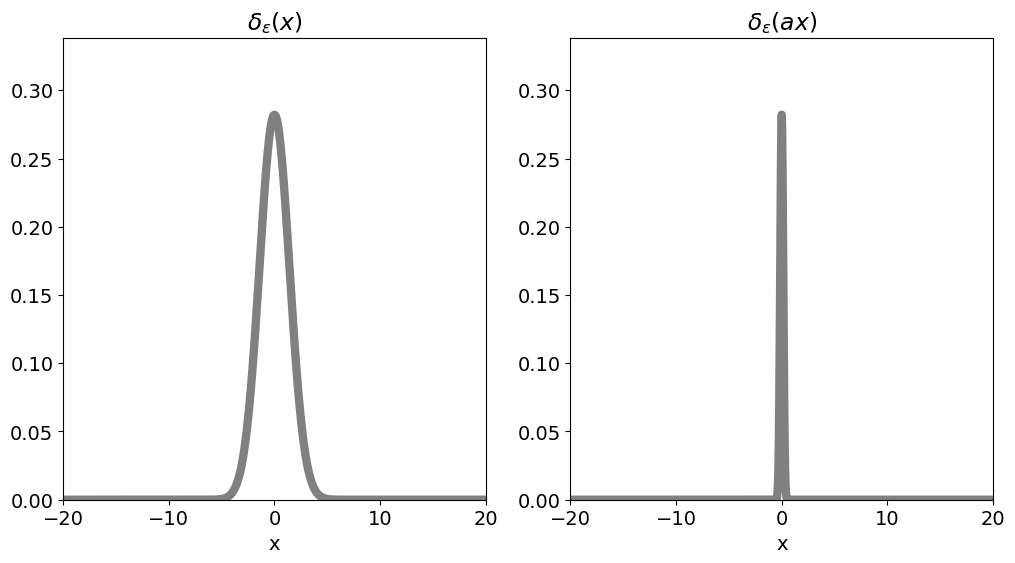

In [5]:
# Simulate 1D Gaussian function that approximates a delta function
N = 1001
xmax = 20
x = np.linspace(-xmax,xmax,N)
dx = x[1]-x[0]
epsilon = 1
delta_epsilon = 1/(2*np.sqrt(np.pi*epsilon)) * np.exp(-x*x/(4*epsilon))

plt.figure(figsize=(12,6))
font = {'weight' : 'normal',
        'size'   : 14}

# Plot the signal
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.plot(x,delta_epsilon,'gray',linewidth=6.0)
plt.axis([x[0], x[N-1], 0, np.max(delta_epsilon)*1.2])
plt.xlabel('x')
plt.title(r'$\delta_\epsilon (x)$');
area = dx*sum(delta_epsilon)
print("Original area: ", f"{area:.3}")


# Now let's squeeze by a factor a, and plot
a = 10
delta_epsilon_a = 1/(2*np.sqrt(np.pi*epsilon)) * np.exp(-a*x*a*x/(4*epsilon))
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.plot(x,delta_epsilon_a,'gray',linewidth=6.0)
plt.axis([x[0], x[N-1], 0, np.max(delta_epsilon_a)*1.2])
plt.xlabel('x')
plt.title(r'$\delta_\epsilon (a x)$');
area_a = dx*sum(delta_epsilon_a)
print("Squeezed signal (a = ", a , ") area: ", f"{area_a:.3}")


# Q4: Scaling property (continued)

Now, the fact that if we squeeze a signal horizontally we get a different area is not very surprising, and we still have not introduced any vertical scaling as stated in the scaling property of the delta function. This vertical scaling will appear when we consider that the delta function is not a regular function (it's really not a function) but can be viewed nicely in the limit as a bump-shaped function gets narrower and taller. 

So, let's revisit our limit-based definition of the delta function using a Gaussian, and let's squeeze it horizontally by a factor of $a$:

$\delta(a x) = \lim_{\epsilon \to 0^+} \frac{1}{2 \sqrt{\pi \epsilon}} e^{-\frac{a^2 x^2}{4 \epsilon}}$

The question is, how can we manipulate this expression to demonstrate the scaling property? Think about replacing $\epsilon$ by $\xi = \epsilon/a^2$ in the expression above, and make sure to write the limit as 
  
$\delta (ax) = \lim_{\xi \to 0^+} \delta_\xi (x,a)$ 

for some function $\delta_\xi (x,a)$ (which depends on $a$ too) - note the similarity of this expression above with the definition of the delta function. 

Question: what is the corresponding expression for $\delta_\xi (x,a)$?

A. $\frac{1}{2 \sqrt{\pi \xi}} e^{-\frac{a^2 x^2}{4 \xi}}$

B. $\frac{1}{2 \sqrt{\pi \xi}} e^{-\frac{x^2}{4 \xi}}$

C. $\frac{1}{|a|} \frac{1}{2 \sqrt{\pi \xi}} e^{-\frac{x^2}{4 \xi}}$

D. $\frac{1}{2 \sqrt{\pi a \xi}} e^{-\frac{x^2}{4 \xi}}$







Scaled signal area:  0.1
Vertical scaling:  0.1


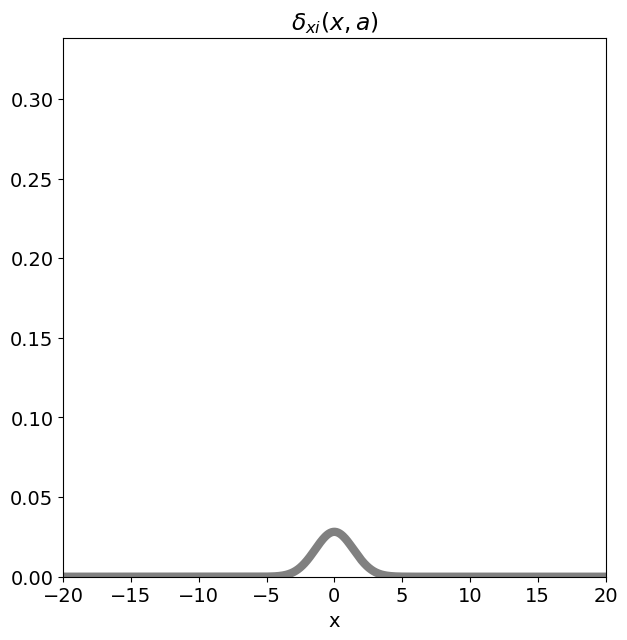

In [6]:
# Now let's show our signal
xi = 1 # Let's keep xi the same as epsilon, so the width is the same
plt.figure(figsize=(7,7))
delta_epsilon_xi = 1/(2*np.abs(a)*np.sqrt(np.pi*xi)) * np.exp(-x*x/(4*xi))
plt.rc('font', **font)
plt.plot(x,delta_epsilon_xi,'gray',linewidth=6.0)
plt.axis([x[0], x[N-1], 0, np.max(delta_epsilon_a)*1.2])
plt.xlabel('x')
plt.title(r'$\delta_{xi} (x,a)$');
area_xi = dx*sum(delta_epsilon_xi)
height_ratio = np.max(delta_epsilon_xi)/np.max(delta_epsilon_a)
print("Scaled signal area: ", f"{area_xi:.3}")
print("Vertical scaling: ", f"{height_ratio:.3}")

